# Twitter Data Vizualizations

In [ ]:
# import pandas as pd
# import numpy as np
# import string, re
# import itertools
# import nltk
# import plotly.offline as py
# import plotly.graph_objs as go
# import matplotlib.pyplot as plt
# import seaborn as sns
# from wordcloud import WordCloud,STOPWORDS
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Dense, Embedding, LSTM
# from keras.callbacks import EarlyStopping
import pandas as pd
import re
import nltk
import string
import os
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import glob, os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

py.init_notebook_mode(connected=True)
%matplotlib inline

In [ ]:
def read_tsv(file_path):
    df = pd.read_table(file_path)
    return df

import string
import re

# code inspired from https://www.kaggle.com/rahulvv/bidirectional-lstm-glove200d


def remove_urls(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
  
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def split_text(text):
    text = text.split()
    return text

def lower(text):
    text = [word.lower() for word in text]
    return str(text)

def remove_punct(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', str(text))
    return text

def remove_stopwords(text):
    pattern = re.compile(r'\b('+r'|'.join(stopwords.words('english')) + r')\b\s*')
    text = pattern.sub(' ', text)
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    text = lemmatizer.lemmatize(text)
    return text

def clean_tweet(text):
    t0 = remove_urls(text)
    t1 = remove_html(t0)
    t2 = split_text(t1)
    t3 = lower(t2)
    t4 = remove_punct(t3)
    t5 = remove_stopwords(t4)
    t6 = lemmatize_words(t5)
    return t6

In [ ]:
os.chdir("data/")

In [ ]:
tweet_df = pd.DataFrame(columns=['tweet', 'sentiment','NA'])
df_test = pd.DataFrame(columns=['tweet', 'sentiment','NA'])

for file in glob.glob("*.tsv"):
        if 'final_test' in file:
            df_test_cur = read_tsv(file)
            df_test = pd.concat([df_test, df_test_cur])
        else:
            df_train_cur = read_tsv(file)
            tweet_df = pd.concat([tweet_df, df_train_cur])

In [ ]:
print(tweet_df[['tweet', 'sentiment']] )

                                                  tweet sentiment
0     Gas by my house hit $3.39!!!! I\u2019m going t...  positive
1     Theo Walcott is still shit\u002c watch Rafa an...  negative
2     its not that I\u2019m a GSP fan\u002c i just h...  negative
3     Iranian general says Israel\u2019s Iron Dome c...  negative
4     Tehran\u002c Mon Amour: Obama Tried to Establi...   neutral
...                                                 ...       ...
2385  the day after newark ill be able to say ""i me...   neutral
2386  FEC hold farewell session for seven ministers ...   neutral
2387  Luca Di Montezemolo (who's last day was Monday...   neutral
2388  Coffee is pretty much the answer to all questi...  positive
2389  Niki Lauda just confirmed to Sky that Alonso w...   neutral

[53368 rows x 2 columns]


In [ ]:
print(df_test[['tweet', 'sentiment']] )

                                                   tweet sentiment
0      #ArianaGrande Ari By Ariana Grande 80% Full ht...   neutral
1      Ariana Grande KIIS FM Yours Truly CD listening...  positive
2      Ariana Grande White House Easter Egg Roll in W...  positive
3      #CD #Musics Ariana Grande Sweet Like Candy 3.4...  positive
4      SIDE TO SIDE 😘 @arianagrande #sidetoside #aria...   neutral
...                                                  ...       ...
11901  @dansen17 update: Zac Efron kissing a puppy ht...  positive
11902  #zac efron sex pic skins michelle sex https://...   neutral
11903  First Look at Neighbors 2 with Zac Efron Shirt...   neutral
11904  zac efron poses nude #lovely libra porn https:...   neutral
11905  #Fashion #Style The Paperboy (NEW Blu-ray Disc...   neutral

[11906 rows x 2 columns]


In [ ]:
#preparing train lables
tweet_df.loc[tweet_df.sentiment == "positive", "sentiment"] = 2
tweet_df.loc[tweet_df.sentiment == "neutral", "sentiment"] = 1
tweet_df.loc[tweet_df.sentiment == "negative", "sentiment"] = 0

labels = tweet_df["sentiment"].tolist()
labels = [ int(x) for x in labels ]

#preparing test labels
df_test.loc[df_test.sentiment == "positive", "sentiment"] = 2
df_test.loc[df_test.sentiment == "neutral", "sentiment"] = 1
df_test.loc[df_test.sentiment == "negative", "sentiment"] = 0

labels_test = df_test["sentiment"].tolist()
labels_test = [ int(x) for x in labels_test ]

In [ ]:
train_tweets = tweet_df.tweet.values
y_train_orig = tweet_df.sentiment.values
test_tweets = df_test.tweet.values
y_test_orig = df_test.sentiment.values

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(y_train_orig)

clean_training_tweets = []
for i in range(len(train_tweets)):
    data = clean_tweet(train_tweets[i])
    clean_training_tweets.append(data)

clean_testing_tweets = []
for i in range(len(test_tweets)):
    data = clean_tweet(test_tweets[i])
    clean_testing_tweets.append(data)

In [ ]:
print(clean_training_tweets[:10])
print(clean_testing_tweets[:10])

['gas   house hit  ium going  chapel hill  sat ', 'theo walcott  still shituc watch rafa  johnny deal    saturday', '   ium  gsp fanuc   hate nick diaz canut wait  february', 'iranian general says israelus iron dome canut deal   missiles keep talking like    may end  finding  ', 'tehranuc mon amour obama tried  establish ties   mullahs via pjmediacom  barack obama  vote mitt romney', ' sat   whole movie   harry  ron  christmas ohlawd', ' j davlar th main rivals  team poland hopefully   make   successful end   tough week  training tomorrow', 'talking  actus  satusuc deciding   want  go  collegeuc applying  colleges  everything  college stresses   ', '  happy valentines day trending itus   th  february  th  june smh', ' may   superbowl  dallasuc  dallas ainut winning  superbowl    quarterback  owner snyc rasmussenpoll']
['arianagrande ari  ariana grande  full singer actress', 'ariana grande kiis fm  truly cd listening party  burbank arianagrande', 'ariana grande white house easter egg ro

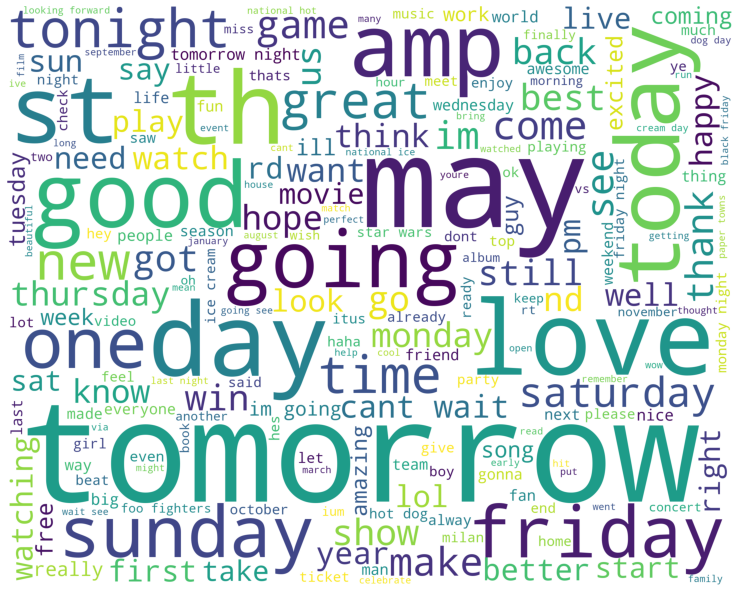

In [ ]:

train_d = {'tweet': clean_training_tweets, "sentiment": y_train_orig}
test_d = {'tweet': clean_testing_tweets, "sentiment": y_test_orig}

train_df_cl = pd.DataFrame(train_d)
test_df_cl = pd.DataFrame(test_d)

df = pd.concat([train_df_cl, test_df_cl])


df_pos = df[ df['sentiment'] == 2]
df_pos = df_pos['tweet']
df_neg = df[ df['sentiment'] == 0]
df_neg = df_neg['tweet']
df_neut = df[ df['sentiment'] == 1]
df_neut = df_neut['tweet']
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_pos))
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

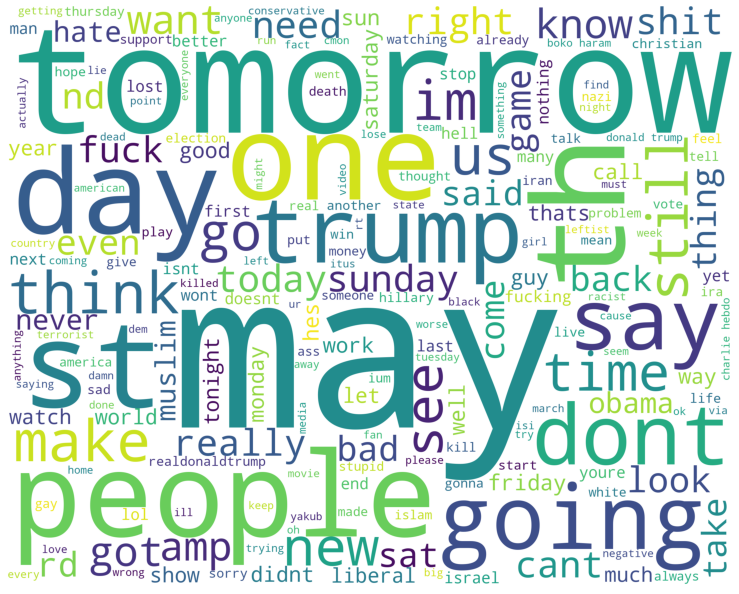

In [ ]:
wordcloud2 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_neg))
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

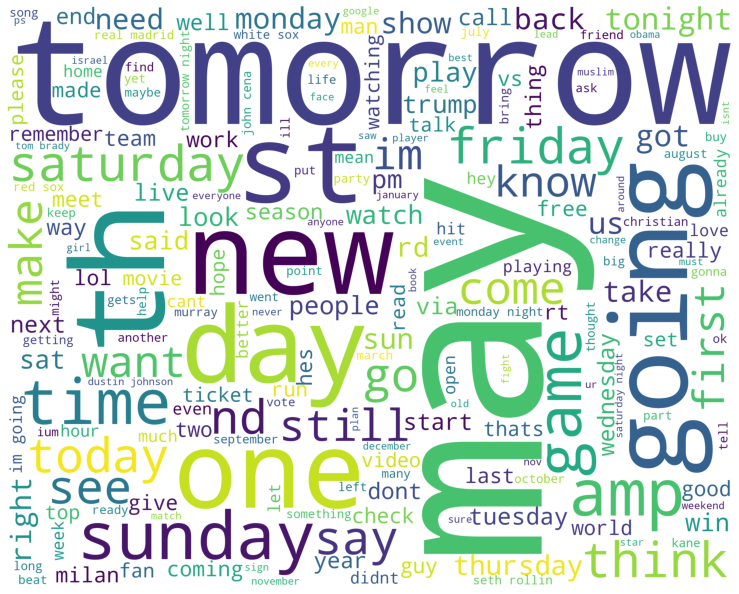

In [ ]:
wordcloud3 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_neut))
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud3)
plt.axis('off')
plt.show()

In [ ]:
sns.set(style="darkgrid")


train_df_cl_pos = train_df_cl[ train_df_cl['sentiment'] == 2].shape[0]
train_df_cl_neg = train_df_cl[ train_df_cl['sentiment'] == 0].shape[0]
train_df_cl_neut = train_df_cl[ train_df_cl['sentiment'] == 1].shape[0]
test_df_cl_pos = test_df_cl[ test_df_cl['sentiment'] == 2].shape[0]
test_df_cl_neg = test_df_cl[ test_df_cl['sentiment'] == 0].shape[0]
test_df_cl_neut = test_df_cl[ test_df_cl['sentiment'] == 1].shape[0]



[20718, 24143, 8507]


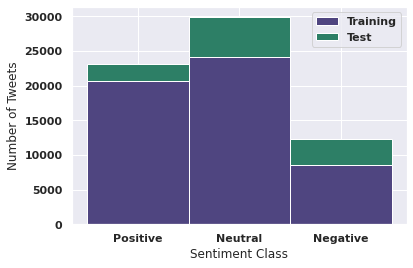

In [ ]:

import matplotlib.pyplot as plt
from matplotlib import rc
 
# Values of each group
bars1 = [train_df_cl_pos, train_df_cl_neut, train_df_cl_neg]
print(bars1)
bars2 = [test_df_cl_pos, test_df_cl_neut, test_df_cl_neg]

# # Heights of bars1 + bars2
# bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['Positive','Neutral','Negative']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#4f4580', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#2d7f66', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names)
plt.ylabel("Number of Tweets")
plt.xlabel("Sentiment Class")
plt.legend(['Training','Test'])
 
# Show graphic
plt.show()
